In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv("../Resources/clean_data_with_datetime_10_18.csv")

In [3]:
df.head()

,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
0,2018-12-31,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,0 2019-04-13\n1 2019-04-13\n2 ...
1,2018-12-31,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,0 2019-04-13\n1 2019-04-13\n2 ...
2,2018-12-31,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,0 2019-04-13\n1 2019-04-13\n2 ...
3,2018-12-31,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,0 2019-04-13\n1 2019-04-13\n2 ...
4,2018-12-31,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,0 2019-04-13\n1 2019-04-13\n2 ...


In [4]:
df.dtypes

Datetime                        object
Highest Offense Description     object
Highest Offense Code             int64
Family Violence                 object
Occurred Date                   object
Occurred Time                    int64
Location Type                   object
Address                         object
Zip Code                       float64
Council District               float64
APD Sector                      object
Census Tract                   float64
Clearance Status                object
Clearance Date                  object
Category Description            object
Latitude                       float64
Longitude                      float64
Datetime String                 object
dtype: object

In [5]:
df["Datetime"] = pd.to_datetime( df["Datetime"])
df.dtypes

Datetime                       datetime64[ns]
Highest Offense Description            object
Highest Offense Code                    int64
Family Violence                        object
Occurred Date                          object
Occurred Time                           int64
Location Type                          object
Address                                object
Zip Code                              float64
Council District                      float64
APD Sector                             object
Census Tract                          float64
Clearance Status                       object
Clearance Date                         object
Category Description                   object
Latitude                              float64
Longitude                             float64
Datetime String                        object
dtype: object

,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
0,2018-12-31,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,0 2019-04-13\n1 2019-04-13\n2 ...
1,2018-12-31,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,0 2019-04-13\n1 2019-04-13\n2 ...
2,2018-12-31,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,0 2019-04-13\n1 2019-04-13\n2 ...
3,2018-12-31,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,0 2019-04-13\n1 2019-04-13\n2 ...
4,2018-12-31,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,0 2019-04-13\n1 2019-04-13\n2 ...


In [77]:
sample = df.iloc[1:10]

In [46]:
sample.dtypes

Datetime                       datetime64[ns]
Highest Offense Description            object
Highest Offense Code                    int64
Family Violence                        object
Occurred Date                          object
Occurred Time                           int64
Location Type                          object
Address                                object
Zip Code                              float64
Council District                      float64
APD Sector                             object
Census Tract                          float64
Clearance Status                       object
Clearance Date                         object
Category Description                   object
Latitude                              float64
Longitude                             float64
Datetime String                        object
dtype: object

In [47]:
time_len = []

for index, row in df.iterrows():
    time_len.append( len( str(row["Occurred Time"])) )

In [53]:
freq = {}
for value in time_len:
    if value not in freq:
        freq[value] = 1
    else:
        freq[value] += 1

In [60]:
freq
sample["Time String "] = ""
sample = sample.drop(columns=["Datetime String"])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


sample.head()

In [78]:
sample.head()
df = df.drop(columns=["Datetime String"])


KeyError: "['Datetime String'] not found in axis"

In [80]:
sample["Datetime string"] = ""
sample.head()
sample.set_index("Datetime")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime string
Datetime,,,,,,,,,,,,,,,,,
2018-12-31,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,
2018-12-31,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,
2018-12-31,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,
2018-12-31,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,
2018-12-31,FAMILY DISTURBANCE,3400,N,2018-12-31,1533,GROCERY / SUPERMARKET,7112 ED BLUESTEIN BLVD SVRD SB,78723.0,1.0,CH,21.08,N,1/7/19,NaN,30.313883,-97.663207,
2018-12-31,CRIMINAL MISCHIEF,1400,N,2018-12-31,1939,COMMERCIAL / OFFICE BUILDING,5506 W US 290 HWY SVRD WB,78735.0,8.0,DA,19.15,N,1/7/19,NaN,30.237146,-97.842116,
2018-12-31,ASSAULT WITH INJURY,900,N,2018-12-31,300,STREETS / HWY / ROAD / ALLEY,15433 FM 1325 RD,78728.0,6.0,88,205.04,NaN,NaN,NaN,30.463688,-97.693866,
2018-12-31,RECKLESS DAMAGE,1401,N,2018-12-31,2154,RESIDENCE / HOME,10511 BROWNIE DR,78753.0,4.0,ED,18.23,N,1/9/19,NaN,30.370499,-97.682282,
2018-12-31,CRIMINAL MISCHIEF,1400,N,2018-12-31,2200,RESIDENCE / HOME,8016 BANNOCK LN,78747.0,2.0,FR,24.26,N,1/9/19,NaN,30.158581,-97.743003,


In [89]:
sample.iloc[0,17]

''

In [94]:
for index, row in sample.iterrows():
    length = len( str( row["Occurred Time"] ) )
    if length == 1:
        sample.iloc[index-1, 17] = row["Occurred Date"]
        sample.iloc[index-1, 17] += " 000"
        sample.iloc[index-1, 17] += str(row["Occurred Time"])
    elif length == 2:
        sample.iloc[index-1, 17] = row["Occurred Date"]
        sample.iloc[index-1, 17] += " 00"
        sample.iloc[index, 17] += str(row["Occurred Time"])
    elif length == 3:
        sample.iloc[index-1, 17] = row["Occurred Date"]
        sample.iloc[index-1, 17] += " 0"
        sample.iloc[index-1, 17] += str(row["Occurred Time"])
    elif length == 4:
        sample.iloc[index-1, 17] = row["Occurred Date"]
        sample.iloc[index-1, 17] += " "
        sample.iloc[index-1, 17] += str(row["Occurred Time"])
    else:
        print("idk wtf")


In [95]:
sample.head(10)

,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime string
1,2018-12-31,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2,2018-12-31,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
3,2018-12-31,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
4,2018-12-31,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930
5,2018-12-31,FAMILY DISTURBANCE,3400,N,2018-12-31,1533,GROCERY / SUPERMARKET,7112 ED BLUESTEIN BLVD SVRD SB,78723.0,1.0,CH,21.08,N,1/7/19,NaN,30.313883,-97.663207,2018-12-31 1533
6,2018-12-31,CRIMINAL MISCHIEF,1400,N,2018-12-31,1939,COMMERCIAL / OFFICE BUILDING,5506 W US 290 HWY SVRD WB,78735.0,8.0,DA,19.15,N,1/7/19,NaN,30.237146,-97.842116,2018-12-31 1939
7,2018-12-31,ASSAULT WITH INJURY,900,N,2018-12-31,300,STREETS / HWY / ROAD / ALLEY,15433 FM 1325 RD,78728.0,6.0,88,205.04,NaN,NaN,NaN,30.463688,-97.693866,2018-12-31 0300
8,2018-12-31,RECKLESS DAMAGE,1401,N,2018-12-31,2154,RESIDENCE / HOME,10511 BROWNIE DR,78753.0,4.0,ED,18.23,N,1/9/19,NaN,30.370499,-97.682282,2018-12-31 2154
9,2018-12-31,CRIMINAL MISCHIEF,1400,N,2018-12-31,2200,RESIDENCE / HOME,8016 BANNOCK LN,78747.0,2.0,FR,24.26,N,1/9/19,NaN,30.158581,-97.743003,2018-12-31 2200


In [97]:
sample["Datetime"] = pd.to_datetime( sample["Datetime string"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
sample.dtypes

Datetime                       datetime64[ns]
Highest Offense Description            object
Highest Offense Code                    int64
Family Violence                        object
Occurred Date                          object
Occurred Time                           int64
Location Type                          object
Address                                object
Zip Code                              float64
Council District                      float64
APD Sector                             object
Census Tract                          float64
Clearance Status                       object
Clearance Date                         object
Category Description                   object
Latitude                              float64
Longitude                             float64
Datetime string                        object
dtype: object

In [100]:
sample.set_index("Datetime")

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime string
Datetime,,,,,,,,,,,,,,,,,
2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930
2018-12-31 15:33:00,FAMILY DISTURBANCE,3400,N,2018-12-31,1533,GROCERY / SUPERMARKET,7112 ED BLUESTEIN BLVD SVRD SB,78723.0,1.0,CH,21.08,N,1/7/19,NaN,30.313883,-97.663207,2018-12-31 1533
2018-12-31 19:39:00,CRIMINAL MISCHIEF,1400,N,2018-12-31,1939,COMMERCIAL / OFFICE BUILDING,5506 W US 290 HWY SVRD WB,78735.0,8.0,DA,19.15,N,1/7/19,NaN,30.237146,-97.842116,2018-12-31 1939
2018-12-31 03:00:00,ASSAULT WITH INJURY,900,N,2018-12-31,300,STREETS / HWY / ROAD / ALLEY,15433 FM 1325 RD,78728.0,6.0,88,205.04,NaN,NaN,NaN,30.463688,-97.693866,2018-12-31 0300
2018-12-31 21:54:00,RECKLESS DAMAGE,1401,N,2018-12-31,2154,RESIDENCE / HOME,10511 BROWNIE DR,78753.0,4.0,ED,18.23,N,1/9/19,NaN,30.370499,-97.682282,2018-12-31 2154
2018-12-31 22:00:00,CRIMINAL MISCHIEF,1400,N,2018-12-31,2200,RESIDENCE / HOME,8016 BANNOCK LN,78747.0,2.0,FR,24.26,N,1/9/19,NaN,30.158581,-97.743003,2018-12-31 2200


In [112]:
sample.iloc[1,0].day_name()

'Monday'

In [119]:
df["Datetime String"] = ""
df.head()

,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
0,2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,
1,2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,
2,2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,
3,2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,
4,2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,


In [120]:
df.iloc[1,17]

''

In [170]:
for index, row in df.iterrows():
    if row["Datetime String"] == "":
        print( index )
        length = len( str( row["Occurred Time"] ) )
        if length == 1:
            df.iloc[index, 17] = str(row["Occurred Date"] )
            df.iloc[index, 17] += " 000"
            df.iloc[index, 17] += str(row["Occurred Time"])
        elif length == 2:
            df.iloc[index, 17] = str( row["Occurred Date"] )
            df.iloc[index, 17] += " 00"
            df.iloc[index, 17] += str(row["Occurred Time"])
        elif length == 3:
            df.iloc[index, 17] = str( row["Occurred Date"] )
            df.iloc[index, 17] += " 0"
            df.iloc[index, 17] += str(row["Occurred Time"])
        elif length == 4:
            df.iloc[index, 17] = str( row["Occurred Date"] )
            df.iloc[index, 17] += " "
            df.iloc[index, 17] += str(row["Occurred Time"])
        else:
            print("idk wtf")

44265
44266
44267
44268
44269
44270
44271
44272
44273
44274
44275
44276
44277
44278
44279
44280
44281
44282
44283
44284
44285
44286
44287
44288
44289
44290
44291
44292
44293
44294
44295
44296
44297
44298
44299
44300
44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
4443

45631
45632
45633
45634
45635
45636
45637
45638
45639
45640
45641
45642
45643
45644
45645
45646
45647
45648
45649
45650
45651
45652
45653
45654
45655
45656
45657
45658
45659
45660
45661
45662
45663
45664
45665
45666
45667
45668
45669
45670
45671
45672
45673
45674
45675
45676
45677
45678
45679
45680
45681
45682
45683
45684
45685
45686
45687
45688
45689
45690
45691
45692
45693
45694
45695
45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
4579

46997
46998
46999
47000
47001
47002
47003
47004
47005
47006
47007
47008
47009
47010
47011
47012
47013
47014
47015
47016
47017
47018
47019
47020
47021
47022
47023
47024
47025
47026
47027
47028
47029
47030
47031
47032
47033
47034
47035
47036
47037
47038
47039
47040
47041
47042
47043
47044
47045
47046
47047
47048
47049
47050
47051
47052
47053
47054
47055
47056
47057
47058
47059
47060
47061
47062
47063
47064
47065
47066
47067
47068
47069
47070
47071
47072
47073
47074
47075
47076
47077
47078
47079
47080
47081
47082
47083
47084
47085
47086
47087
47088
47089
47090
47091
47092
47093
47094
47095
47096
47097
47098
47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
4716

48363
48364
48365
48366
48367
48368
48369
48370
48371
48372
48373
48374
48375
48376
48377
48378
48379
48380
48381
48382
48383
48384
48385
48386
48387
48388
48389
48390
48391
48392
48393
48394
48395
48396
48397
48398
48399
48400
48401
48402
48403
48404
48405
48406
48407
48408
48409
48410
48411
48412
48413
48414
48415
48416
48417
48418
48419
48420
48421
48422
48423
48424
48425
48426
48427
48428
48429
48430
48431
48432
48433
48434
48435
48436
48437
48438
48439
48440
48441
48442
48443
48444
48445
48446
48447
48448
48449
48450
48451
48452
48453
48454
48455
48456
48457
48458
48459
48460
48461
48462
48463
48464
48465
48466
48467
48468
48469
48470
48471
48472
48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
48483
48484
48485
48486
48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
48502
48503
48504
48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
4852

49729
49730
49731
49732
49733
49734
49735
49736
49737
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49748
49749
49750
49751
49752
49753
49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
4989

51095
51096
51097
51098
51099
51100
51101
51102
51103
51104
51105
51106
51107
51108
51109
51110
51111
51112
51113
51114
51115
51116
51117
51118
51119
51120
51121
51122
51123
51124
51125
51126
51127
51128
51129
51130
51131
51132
51133
51134
51135
51136
51137
51138
51139
51140
51141
51142
51143
51144
51145
51146
51147
51148
51149
51150
51151
51152
51153
51154
51155
51156
51157
51158
51159
51160
51161
51162
51163
51164
51165
51166
51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
5126

52462
52463
52464
52465
52466
52467
52468
52469
52470
52471
52472
52473
52474
52475
52476
52477
52478
52479
52480
52481
52482
52483
52484
52485
52486
52487
52488
52489
52490
52491
52492
52493
52494
52495
52496
52497
52498
52499
52500
52501
52502
52503
52504
52505
52506
52507
52508
52509
52510
52511
52512
52513
52514
52515
52516
52517
52518
52519
52520
52521
52522
52523
52524
52525
52526
52527
52528
52529
52530
52531
52532
52533
52534
52535
52536
52537
52538
52539
52540
52541
52542
52543
52544
52545
52546
52547
52548
52549
52550
52551
52552
52553
52554
52555
52556
52557
52558
52559
52560
52561
52562
52563
52564
52565
52566
52567
52568
52569
52570
52571
52572
52573
52574
52575
52576
52577
52578
52579
52580
52581
52582
52583
52584
52585
52586
52587
52588
52589
52590
52591
52592
52593
52594
52595
52596
52597
52598
52599
52600
52601
52602
52603
52604
52605
52606
52607
52608
52609
52610
52611
52612
52613
52614
52615
52616
52617
52618
52619
52620
52621
52622
52623
52624
52625
52626
52627
5262

53829
53830
53831
53832
53833
53834
53835
53836
53837
53838
53839
53840
53841
53842
53843
53844
53845
53846
53847
53848
53849
53850
53851
53852
53853
53854
53855
53856
53857
53858
53859
53860
53861
53862
53863
53864
53865
53866
53867
53868
53869
53870
53871
53872
53873
53874
53875
53876
53877
53878
53879
53880
53881
53882
53883
53884
53885
53886
53887
53888
53889
53890
53891
53892
53893
53894
53895
53896
53897
53898
53899
53900
53901
53902
53903
53904
53905
53906
53907
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53921
53922
53923
53924
53925
53926
53927
53928
53929
53930
53931
53932
53933
53934
53935
53936
53937
53938
53939
53940
53941
53942
53943
53944
53945
53946
53947
53948
53949
53950
53951
53952
53953
53954
53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
5399

55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55224
55225
55226
55227
55228
55229
55230
55231
55232
55233
55234
55235
55236
55237
55238
55239
55240
55241
55242
55243
55244
55245
55246
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55259
55260
55261
55262
55263
55264
55265
55266
55267
55268
55269
55270
55271
55272
55273
55274
55275
55276
55277
55278
55279
55280
55281
55282
55283
55284
55285
55286
55287
55288
55289
55290
55291
55292
55293
55294
55295
55296
55297
55298
55299
55300
55301
55302
55303
55304
55305
55306
55307
55308
55309
55310
55311
55312
55313
55314
55315
55316
55317
55318
55319
55320
55321
55322
55323
55324
55325
55326
55327
55328
55329
55330
55331
55332
55333
55334
55335
55336
55337
55338
55339
55340
55341
55342
55343
55344
55345
55346
55347
55348
55349
55350
55351
55352
55353
55354
55355
55356
55357
55358
55359
55360
5536

56562
56563
56564
56565
56566
56567
56568
56569
56570
56571
56572
56573
56574
56575
56576
56577
56578
56579
56580
56581
56582
56583
56584
56585
56586
56587
56588
56589
56590
56591
56592
56593
56594
56595
56596
56597
56598
56599
56600
56601
56602
56603
56604
56605
56606
56607
56608
56609
56610
56611
56612
56613
56614
56615
56616
56617
56618
56619
56620
56621
56622
56623
56624
56625
56626
56627
56628
56629
56630
56631
56632
56633
56634
56635
56636
56637
56638
56639
56640
56641
56642
56643
56644
56645
56646
56647
56648
56649
56650
56651
56652
56653
56654
56655
56656
56657
56658
56659
56660
56661
56662
56663
56664
56665
56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
56683
56684
56685
56686
56687
56688
56689
56690
56691
56692
56693
56694
56695
56696
56697
56698
56699
56700
56701
56702
56703
56704
56705
56706
56707
56708
56709
56710
56711
56712
56713
56714
56715
56716
56717
56718
56719
56720
56721
56722
56723
56724
56725
56726
56727
5672

57929
57930
57931
57932
57933
57934
57935
57936
57937
57938
57939
57940
57941
57942
57943
57944
57945
57946
57947
57948
57949
57950
57951
57952
57953
57954
57955
57956
57957
57958
57959
57960
57961
57962
57963
57964
57965
57966
57967
57968
57969
57970
57971
57972
57973
57974
57975
57976
57977
57978
57979
57980
57981
57982
57983
57984
57985
57986
57987
57988
57989
57990
57991
57992
57993
57994
57995
57996
57997
57998
57999
58000
58001
58002
58003
58004
58005
58006
58007
58008
58009
58010
58011
58012
58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
58052
58053
58054
58055
58056
58057
58058
58059
58060
58061
58062
58063
58064
58065
58066
58067
58068
58069
58070
58071
58072
58073
58074
58075
58076
58077
58078
58079
58080
58081
58082
58083
58084
58085
58086
58087
58088
58089
58090
58091
58092
58093
58094
5809

59296
59297
59298
59299
59300
59301
59302
59303
59304
59305
59306
59307
59308
59309
59310
59311
59312
59313
59314
59315
59316
59317
59318
59319
59320
59321
59322
59323
59324
59325
59326
59327
59328
59329
59330
59331
59332
59333
59334
59335
59336
59337
59338
59339
59340
59341
59342
59343
59344
59345
59346
59347
59348
59349
59350
59351
59352
59353
59354
59355
59356
59357
59358
59359
59360
59361
59362
59363
59364
59365
59366
59367
59368
59369
59370
59371
59372
59373
59374
59375
59376
59377
59378
59379
59380
59381
59382
59383
59384
59385
59386
59387
59388
59389
59390
59391
59392
59393
59394
59395
59396
59397
59398
59399
59400
59401
59402
59403
59404
59405
59406
59407
59408
59409
59410
59411
59412
59413
59414
59415
59416
59417
59418
59419
59420
59421
59422
59423
59424
59425
59426
59427
59428
59429
59430
59431
59432
59433
59434
59435
59436
59437
59438
59439
59440
59441
59442
59443
59444
59445
59446
59447
59448
59449
59450
59451
59452
59453
59454
59455
59456
59457
59458
59459
59460
59461
5946

60663
60664
60665
60666
60667
60668
60669
60670
60671
60672
60673
60674
60675
60676
60677
60678
60679
60680
60681
60682
60683
60684
60685
60686
60687
60688
60689
60690
60691
60692
60693
60694
60695
60696
60697
60698
60699
60700
60701
60702
60703
60704
60705
60706
60707
60708
60709
60710
60711
60712
60713
60714
60715
60716
60717
60718
60719
60720
60721
60722
60723
60724
60725
60726
60727
60728
60729
60730
60731
60732
60733
60734
60735
60736
60737
60738
60739
60740
60741
60742
60743
60744
60745
60746
60747
60748
60749
60750
60751
60752
60753
60754
60755
60756
60757
60758
60759
60760
60761
60762
60763
60764
60765
60766
60767
60768
60769
60770
60771
60772
60773
60774
60775
60776
60777
60778
60779
60780
60781
60782
60783
60784
60785
60786
60787
60788
60789
60790
60791
60792
60793
60794
60795
60796
60797
60798
60799
60800
60801
60802
60803
60804
60805
60806
60807
60808
60809
60810
60811
60812
60813
60814
60815
60816
60817
60818
60819
60820
60821
60822
60823
60824
60825
60826
60827
60828
6082

62030
62031
62032
62033
62034
62035
62036
62037
62038
62039
62040
62041
62042
62043
62044
62045
62046
62047
62048
62049
62050
62051
62052
62053
62054
62055
62056
62057
62058
62059
62060
62061
62062
62063
62064
62065
62066
62067
62068
62069
62070
62071
62072
62073
62074
62075
62076
62077
62078
62079
62080
62081
62082
62083
62084
62085
62086
62087
62088
62089
62090
62091
62092
62093
62094
62095
62096
62097
62098
62099
62100
62101
62102
62103
62104
62105
62106
62107
62108
62109
62110
62111
62112
62113
62114
62115
62116
62117
62118
62119
62120
62121
62122
62123
62124
62125
62126
62127
62128
62129
62130
62131
62132
62133
62134
62135
62136
62137
62138
62139
62140
62141
62142
62143
62144
62145
62146
62147
62148
62149
62150
62151
62152
62153
62154
62155
62156
62157
62158
62159
62160
62161
62162
62163
62164
62165
62166
62167
62168
62169
62170
62171
62172
62173
62174
62175
62176
62177
62178
62179
62180
62181
62182
62183
62184
62185
62186
62187
62188
62189
62190
62191
62192
62193
62194
62195
6219

KeyboardInterrupt: 

In [141]:
len(df)

513592

In [165]:
df.head(40190)

,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
0,2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,2018-12-31 0000
1,2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2,2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
3,2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
4,2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40185,2018-03-13 00:00:00,RUNAWAY CHILD,4100,N,2018-03-13,1930,RESIDENCE / HOME,2901 COLLINS CREEK DR,78741.0,3.0,HE,23.13,N,4/10/18,NaN,30.224091,-97.730938,
40186,2018-03-13 00:00:00,IDENTITY THEFT,4022,N,2018-03-13,545,OTHER / UNKNOWN,12101 DESSAU RD,78754.0,1.0,ED,18.34,N,3/15/18,NaN,30.382122,-97.650877,
40187,2018-03-13 00:00:00,CRIMINAL MISCHIEF,1400,N,2018-03-13,900,RESIDENCE / HOME,1400 WERNER HILL DR,78753.0,4.0,ED,18.33,N,5/29/18,NaN,30.359694,-97.672747,
40188,2018-03-13 00:00:00,ASSAULT BY THREAT,901,N,2018-03-13,1707,PARKING LOTS / GARAGE,1105 W LIVE OAK ST,78704.0,9.0,DA,13.05,N,3/19/18,NaN,30.246589,-97.765133,


In [216]:
df.to_csv("../Resources/clean_data_with_datetime_10_18.csv")

In [172]:
df = pd.read_csv("../Resources/clean_data_with_datetime_10_18.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [260]:
df.head()

,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
0,2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,2018-12-31 0000
1,2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2,2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
3,2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
4,2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2018-12-12 00:00:00,THEFT BY SHOPLIFTING,607,N,2018-12-12,100,CONVENIENCE STORE,1660 E 51ST ST,78723.0,4.0,ID,21.05,N,12/12/18,Theft,30.304440,-97.698906,2018-12-12 0100
4996,2018-12-12 00:00:00,AIRPORT - BREACH OF SECURITY,1110,N,2018-12-12,620,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),1075 ABIA WAY,78719.0,2.0,AP,9800.00,NaN,NaN,NaN,30.202251,-97.668657,2018-12-12 0620
4997,2018-12-12 00:00:00,HARASSMENT,2703,N,2018-12-12,2149,RESIDENCE / HOME,2900 HILLVIEW RD,78703.0,10.0,BA,16.04,N,12/18/18,NaN,30.308032,-97.767685,2018-12-12 2149
4998,2018-12-12 00:00:00,POSS CONTROLLED SUB/NARCOTIC,1800,N,2018-12-12,1555,PARKING LOTS / GARAGE,1034 CLAYTON LN,78723.0,1.0,ID,21.05,C,12/18/18,NaN,30.319544,-97.703293,2018-12-12 1555


In [188]:
df.iloc[500000,18]

nan

In [194]:
df = df.drop(columns=["Unnamed: 0"])

In [202]:
type(df.iloc[500000,17])
if type( df.iloc[500000,17] ) == float:
    print("yo mama")

yo mama


In [242]:
for index, row in df.iterrows():
    if type( row["Datetime String"] ) == float:
        print( index )
        hour_string = " "
        length = len( str( row["Occurred Time"] ) )
        if length == 1:
            hour_string += "000"
        elif length == 2:
            hour_string += "00"
        elif length == 3:
            hour_string += "0"
        df.iloc[index, 17] = str(row["Occurred Date"] )
        df.iloc[index, 17] += hour_string
        df.iloc[index, 17] += str(row["Occurred Time"])
        
        

459442
459443
459444
459445
459446
459447
459448
459449
459450
459451
459452
459453
459454
459455
459456
459457
459458
459459
459460
459461
459462
459463
459464
459465
459466
459467
459468
459469
459470
459471
459472
459473
459474
459475
459476
459477
459478
459479
459480
459481
459482
459483
459484
459485
459486
459487
459488
459489
459490
459491
459492
459493
459494
459495
459496
459497
459498
459499
459500
459501
459502
459503
459504
459505
459506
459507
459508
459509
459510
459511
459512
459513
459514
459515
459516
459517
459518
459519
459520
459521
459522
459523
459524
459525
459526
459527
459528
459529
459530
459531
459532
459533
459534
459535
459536
459537
459538
459539
459540
459541
459542
459543
459544
459545
459546
459547
459548
459549
459550
459551
459552
459553
459554
459555
459556
459557
459558
459559
459560
459561
459562
459563
459564
459565
459566
459567
459568
459569
459570
459571
459572
459573
459574
459575
459576
459577
459578
459579
459580
459581
459582
459583
459584

460613
460614
460615
460616
460617
460618
460619
460620
460621
460622
460623
460624
460625
460626
460627
460628
460629
460630
460631
460632
460633
460634
460635
460636
460637
460638
460639
460640
460641
460642
460643
460644
460645
460646
460647
460648
460649
460650
460651
460652
460653
460654
460655
460656
460657
460658
460659
460660
460661
460662
460663
460664
460665
460666
460667
460668
460669
460670
460671
460672
460673
460674
460675
460676
460677
460678
460679
460680
460681
460682
460683
460684
460685
460686
460687
460688
460689
460690
460691
460692
460693
460694
460695
460696
460697
460698
460699
460700
460701
460702
460703
460704
460705
460706
460707
460708
460709
460710
460711
460712
460713
460714
460715
460716
460717
460718
460719
460720
460721
460722
460723
460724
460725
460726
460727
460728
460729
460730
460731
460732
460733
460734
460735
460736
460737
460738
460739
460740
460741
460742
460743
460744
460745
460746
460747
460748
460749
460750
460751
460752
460753
460754
460755

461784
461785
461786
461787
461788
461789
461790
461791
461792
461793
461794
461795
461796
461797
461798
461799
461800
461801
461802
461803
461804
461805
461806
461807
461808
461809
461810
461811
461812
461813
461814
461815
461816
461817
461818
461819
461820
461821
461822
461823
461824
461825
461826
461827
461828
461829
461830
461831
461832
461833
461834
461835
461836
461837
461838
461839
461840
461841
461842
461843
461844
461845
461846
461847
461848
461849
461850
461851
461852
461853
461854
461855
461856
461857
461858
461859
461860
461861
461862
461863
461864
461865
461866
461867
461868
461869
461870
461871
461872
461873
461874
461875
461876
461877
461878
461879
461880
461881
461882
461883
461884
461885
461886
461887
461888
461889
461890
461891
461892
461893
461894
461895
461896
461897
461898
461899
461900
461901
461902
461903
461904
461905
461906
461907
461908
461909
461910
461911
461912
461913
461914
461915
461916
461917
461918
461919
461920
461921
461922
461923
461924
461925
461926

462955
462956
462957
462958
462959
462960
462961
462962
462963
462964
462965
462966
462967
462968
462969
462970
462971
462972
462973
462974
462975
462976
462977
462978
462979
462980
462981
462982
462983
462984
462985
462986
462987
462988
462989
462990
462991
462992
462993
462994
462995
462996
462997
462998
462999
463000
463001
463002
463003
463004
463005
463006
463007
463008
463009
463010
463011
463012
463013
463014
463015
463016
463017
463018
463019
463020
463021
463022
463023
463024
463025
463026
463027
463028
463029
463030
463031
463032
463033
463034
463035
463036
463037
463038
463039
463040
463041
463042
463043
463044
463045
463046
463047
463048
463049
463050
463051
463052
463053
463054
463055
463056
463057
463058
463059
463060
463061
463062
463063
463064
463065
463066
463067
463068
463069
463070
463071
463072
463073
463074
463075
463076
463077
463078
463079
463080
463081
463082
463083
463084
463085
463086
463087
463088
463089
463090
463091
463092
463093
463094
463095
463096
463097

464126
464127
464128
464129
464130
464131
464132
464133
464134
464135
464136
464137
464138
464139
464140
464141
464142
464143
464144
464145
464146
464147
464148
464149
464150
464151
464152
464153
464154
464155
464156
464157
464158
464159
464160
464161
464162
464163
464164
464165
464166
464167
464168
464169
464170
464171
464172
464173
464174
464175
464176
464177
464178
464179
464180
464181
464182
464183
464184
464185
464186
464187
464188
464189
464190
464191
464192
464193
464194
464195
464196
464197
464198
464199
464200
464201
464202
464203
464204
464205
464206
464207
464208
464209
464210
464211
464212
464213
464214
464215
464216
464217
464218
464219
464220
464221
464222
464223
464224
464225
464226
464227
464228
464229
464230
464231
464232
464233
464234
464235
464236
464237
464238
464239
464240
464241
464242
464243
464244
464245
464246
464247
464248
464249
464250
464251
464252
464253
464254
464255
464256
464257
464258
464259
464260
464261
464262
464263
464264
464265
464266
464267
464268

465297
465298
465299
465300
465301
465302
465303
465304
465305
465306
465307
465308
465309
465310
465311
465312
465313
465314
465315
465316
465317
465318
465319
465320
465321
465322
465323
465324
465325
465326
465327
465328
465329
465330
465331
465332
465333
465334
465335
465336
465337
465338
465339
465340
465341
465342
465343
465344
465345
465346
465347
465348
465349
465350
465351
465352
465353
465354
465355
465356
465357
465358
465359
465360
465361
465362
465363
465364
465365
465366
465367
465368
465369
465370
465371
465372
465373
465374
465375
465376
465377
465378
465379
465380
465381
465382
465383
465384
465385
465386
465387
465388
465389
465390
465391
465392
465393
465394
465395
465396
465397
465398
465399
465400
465401
465402
465403
465404
465405
465406
465407
465408
465409
465410
465411
465412
465413
465414
465415
465416
465417
465418
465419
465420
465421
465422
465423
465424
465425
465426
465427
465428
465429
465430
465431
465432
465433
465434
465435
465436
465437
465438
465439

466468
466469
466470
466471
466472
466473
466474
466475
466476
466477
466478
466479
466480
466481
466482
466483
466484
466485
466486
466487
466488
466489
466490
466491
466492
466493
466494
466495
466496
466497
466498
466499
466500
466501
466502
466503
466504
466505
466506
466507
466508
466509
466510
466511
466512
466513
466514
466515
466516
466517
466518
466519
466520
466521
466522
466523
466524
466525
466526
466527
466528
466529
466530
466531
466532
466533
466534
466535
466536
466537
466538
466539
466540
466541
466542
466543
466544
466545
466546
466547
466548
466549
466550
466551
466552
466553
466554
466555
466556
466557
466558
466559
466560
466561
466562
466563
466564
466565
466566
466567
466568
466569
466570
466571
466572
466573
466574
466575
466576
466577
466578
466579
466580
466581
466582
466583
466584
466585
466586
466587
466588
466589
466590
466591
466592
466593
466594
466595
466596
466597
466598
466599
466600
466601
466602
466603
466604
466605
466606
466607
466608
466609
466610

467639
467640
467641
467642
467643
467644
467645
467646
467647
467648
467649
467650
467651
467652
467653
467654
467655
467656
467657
467658
467659
467660
467661
467662
467663
467664
467665
467666
467667
467668
467669
467670
467671
467672
467673
467674
467675
467676
467677
467678
467679
467680
467681
467682
467683
467684
467685
467686
467687
467688
467689
467690
467691
467692
467693
467694
467695
467696
467697
467698
467699
467700
467701
467702
467703
467704
467705
467706
467707
467708
467709
467710
467711
467712
467713
467714
467715
467716
467717
467718
467719
467720
467721
467722
467723
467724
467725
467726
467727
467728
467729
467730
467731
467732
467733
467734
467735
467736
467737
467738
467739
467740
467741
467742
467743
467744
467745
467746
467747
467748
467749
467750
467751
467752
467753
467754
467755
467756
467757
467758
467759
467760
467761
467762
467763
467764
467765
467766
467767
467768
467769
467770
467771
467772
467773
467774
467775
467776
467777
467778
467779
467780
467781

468810
468811
468812
468813
468814
468815
468816
468817
468818
468819
468820
468821
468822
468823
468824
468825
468826
468827
468828
468829
468830
468831
468832
468833
468834
468835
468836
468837
468838
468839
468840
468841
468842
468843
468844
468845
468846
468847
468848
468849
468850
468851
468852
468853
468854
468855
468856
468857
468858
468859
468860
468861
468862
468863
468864
468865
468866
468867
468868
468869
468870
468871
468872
468873
468874
468875
468876
468877
468878
468879
468880
468881
468882
468883
468884
468885
468886
468887
468888
468889
468890
468891
468892
468893
468894
468895
468896
468897
468898
468899
468900
468901
468902
468903
468904
468905
468906
468907
468908
468909
468910
468911
468912
468913
468914
468915
468916
468917
468918
468919
468920
468921
468922
468923
468924
468925
468926
468927
468928
468929
468930
468931
468932
468933
468934
468935
468936
468937
468938
468939
468940
468941
468942
468943
468944
468945
468946
468947
468948
468949
468950
468951
468952

469981
469982
469983
469984
469985
469986
469987
469988
469989
469990
469991
469992
469993
469994
469995
469996
469997
469998
469999
470000
470001
470002
470003
470004
470005
470006
470007
470008
470009
470010
470011
470012
470013
470014
470015
470016
470017
470018
470019
470020
470021
470022
470023
470024
470025
470026
470027
470028
470029
470030
470031
470032
470033
470034
470035
470036
470037
470038
470039
470040
470041
470042
470043
470044
470045
470046
470047
470048
470049
470050
470051
470052
470053
470054
470055
470056
470057
470058
470059
470060
470061
470062
470063
470064
470065
470066
470067
470068
470069
470070
470071
470072
470073
470074
470075
470076
470077
470078
470079
470080
470081
470082
470083
470084
470085
470086
470087
470088
470089
470090
470091
470092
470093
470094
470095
470096
470097
470098
470099
470100
470101
470102
470103
470104
470105
470106
470107
470108
470109
470110
470111
470112
470113
470114
470115
470116
470117
470118
470119
470120
470121
470122
470123

471152
471153
471154
471155
471156
471157
471158
471159
471160
471161
471162
471163
471164
471165
471166
471167
471168
471169
471170
471171
471172
471173
471174
471175
471176
471177
471178
471179
471180
471181
471182
471183
471184
471185
471186
471187
471188
471189
471190
471191
471192
471193
471194
471195
471196
471197
471198
471199
471200
471201
471202
471203
471204
471205
471206
471207
471208
471209
471210
471211
471212
471213
471214
471215
471216
471217
471218
471219
471220
471221
471222
471223
471224
471225
471226
471227
471228
471229
471230
471231
471232
471233
471234
471235
471236
471237
471238
471239
471240
471241
471242
471243
471244
471245
471246
471247
471248
471249
471250
471251
471252
471253
471254
471255
471256
471257
471258
471259
471260
471261
471262
471263
471264
471265
471266
471267
471268
471269
471270
471271
471272
471273
471274
471275
471276
471277
471278
471279
471280
471281
471282
471283
471284
471285
471286
471287
471288
471289
471290
471291
471292
471293
471294

472323
472324
472325
472326
472327
472328
472329
472330
472331
472332
472333
472334
472335
472336
472337
472338
472339
472340
472341
472342
472343
472344
472345
472346
472347
472348
472349
472350
472351
472352
472353
472354
472355
472356
472357
472358
472359
472360
472361
472362
472363
472364
472365
472366
472367
472368
472369
472370
472371
472372
472373
472374
472375
472376
472377
472378
472379
472380
472381
472382
472383
472384
472385
472386
472387
472388
472389
472390
472391
472392
472393
472394
472395
472396
472397
472398
472399
472400
472401
472402
472403
472404
472405
472406
472407
472408
472409
472410
472411
472412
472413
472414
472415
472416
472417
472418
472419
472420
472421
472422
472423
472424
472425
472426
472427
472428
472429
472430
472431
472432
472433
472434
472435
472436
472437
472438
472439
472440
472441
472442
472443
472444
472445
472446
472447
472448
472449
472450
472451
472452
472453
472454
472455
472456
472457
472458
472459
472460
472461
472462
472463
472464
472465

473494
473495
473496
473497
473498
473499
473500
473501
473502
473503
473504
473505
473506
473507
473508
473509
473510
473511
473512
473513
473514
473515
473516
473517
473518
473519
473520
473521
473522
473523
473524
473525
473526
473527
473528
473529
473530
473531
473532
473533
473534
473535
473536
473537
473538
473539
473540
473541
473542
473543
473544
473545
473546
473547
473548
473549
473550
473551
473552
473553
473554
473555
473556
473557
473558
473559
473560
473561
473562
473563
473564
473565
473566
473567
473568
473569
473570
473571
473572
473573
473574
473575
473576
473577
473578
473579
473580
473581
473582
473583
473584
473585
473586
473587
473588
473589
473590
473591
473592
473593
473594
473595
473596
473597
473598
473599
473600
473601
473602
473603
473604
473605
473606
473607
473608
473609
473610
473611
473612
473613
473614
473615
473616
473617
473618
473619
473620
473621
473622
473623
473624
473625
473626
473627
473628
473629
473630
473631
473632
473633
473634
473635
473636

474665
474666
474667
474668
474669
474670
474671
474672
474673
474674
474675
474676
474677
474678
474679
474680
474681
474682
474683
474684
474685
474686
474687
474688
474689
474690
474691
474692
474693
474694
474695
474696
474697
474698
474699
474700
474701
474702
474703
474704
474705
474706
474707
474708
474709
474710
474711
474712
474713
474714
474715
474716
474717
474718
474719
474720
474721
474722
474723
474724
474725
474726
474727
474728
474729
474730
474731
474732
474733
474734
474735
474736
474737
474738
474739
474740
474741
474742
474743
474744
474745
474746
474747
474748
474749
474750
474751
474752
474753
474754
474755
474756
474757
474758
474759
474760
474761
474762
474763
474764
474765
474766
474767
474768
474769
474770
474771
474772
474773
474774
474775
474776
474777
474778
474779
474780
474781
474782
474783
474784
474785
474786
474787
474788
474789
474790
474791
474792
474793
474794
474795
474796
474797
474798
474799
474800
474801
474802
474803
474804
474805
474806
474807

475836
475837
475838
475839
475840
475841
475842
475843
475844
475845
475846
475847
475848
475849
475850
475851
475852
475853
475854
475855
475856
475857
475858
475859
475860
475861
475862
475863
475864
475865
475866
475867
475868
475869
475870
475871
475872
475873
475874
475875
475876
475877
475878
475879
475880
475881
475882
475883
475884
475885
475886
475887
475888
475889
475890
475891
475892
475893
475894
475895
475896
475897
475898
475899
475900
475901
475902
475903
475904
475905
475906
475907
475908
475909
475910
475911
475912
475913
475914
475915
475916
475917
475918
475919
475920
475921
475922
475923
475924
475925
475926
475927
475928
475929
475930
475931
475932
475933
475934
475935
475936
475937
475938
475939
475940
475941
475942
475943
475944
475945
475946
475947
475948
475949
475950
475951
475952
475953
475954
475955
475956
475957
475958
475959
475960
475961
475962
475963
475964
475965
475966
475967
475968
475969
475970
475971
475972
475973
475974
475975
475976
475977
475978

477007
477008
477009
477010
477011
477012
477013
477014
477015
477016
477017
477018
477019
477020
477021
477022
477023
477024
477025
477026
477027
477028
477029
477030
477031
477032
477033
477034
477035
477036
477037
477038
477039
477040
477041
477042
477043
477044
477045
477046
477047
477048
477049
477050
477051
477052
477053
477054
477055
477056
477057
477058
477059
477060
477061
477062
477063
477064
477065
477066
477067
477068
477069
477070
477071
477072
477073
477074
477075
477076
477077
477078
477079
477080
477081
477082
477083
477084
477085
477086
477087
477088
477089
477090
477091
477092
477093
477094
477095
477096
477097
477098
477099
477100
477101
477102
477103
477104
477105
477106
477107
477108
477109
477110
477111
477112
477113
477114
477115
477116
477117
477118
477119
477120
477121
477122
477123
477124
477125
477126
477127
477128
477129
477130
477131
477132
477133
477134
477135
477136
477137
477138
477139
477140
477141
477142
477143
477144
477145
477146
477147
477148
477149

478178
478179
478180
478181
478182
478183
478184
478185
478186
478187
478188
478189
478190
478191
478192
478193
478194
478195
478196
478197
478198
478199
478200
478201
478202
478203
478204
478205
478206
478207
478208
478209
478210
478211
478212
478213
478214
478215
478216
478217
478218
478219
478220
478221
478222
478223
478224
478225
478226
478227
478228
478229
478230
478231
478232
478233
478234
478235
478236
478237
478238
478239
478240
478241
478242
478243
478244
478245
478246
478247
478248
478249
478250
478251
478252
478253
478254
478255
478256
478257
478258
478259
478260
478261
478262
478263
478264
478265
478266
478267
478268
478269
478270
478271
478272
478273
478274
478275
478276
478277
478278
478279
478280
478281
478282
478283
478284
478285
478286
478287
478288
478289
478290
478291
478292
478293
478294
478295
478296
478297
478298
478299
478300
478301
478302
478303
478304
478305
478306
478307
478308
478309
478310
478311
478312
478313
478314
478315
478316
478317
478318
478319
478320

479349
479350
479351
479352
479353
479354
479355
479356
479357
479358
479359
479360
479361
479362
479363
479364
479365
479366
479367
479368
479369
479370
479371
479372
479373
479374
479375
479376
479377
479378
479379
479380
479381
479382
479383
479384
479385
479386
479387
479388
479389
479390
479391
479392
479393
479394
479395
479396
479397
479398
479399
479400
479401
479402
479403
479404
479405
479406
479407
479408
479409
479410
479411
479412
479413
479414
479415
479416
479417
479418
479419
479420
479421
479422
479423
479424
479425
479426
479427
479428
479429
479430
479431
479432
479433
479434
479435
479436
479437
479438
479439
479440
479441
479442
479443
479444
479445
479446
479447
479448
479449
479450
479451
479452
479453
479454
479455
479456
479457
479458
479459
479460
479461
479462
479463
479464
479465
479466
479467
479468
479469
479470
479471
479472
479473
479474
479475
479476
479477
479478
479479
479480
479481
479482
479483
479484
479485
479486
479487
479488
479489
479490
479491

480520
480521
480522
480523
480524
480525
480526
480527
480528
480529
480530
480531
480532
480533
480534
480535
480536
480537
480538
480539
480540
480541
480542
480543
480544
480545
480546
480547
480548
480549
480550
480551
480552
480553
480554
480555
480556
480557
480558
480559
480560
480561
480562
480563
480564
480565
480566
480567
480568
480569
480570
480571
480572
480573
480574
480575
480576
480577
480578
480579
480580
480581
480582
480583
480584
480585
480586
480587
480588
480589
480590
480591
480592
480593
480594
480595
480596
480597
480598
480599
480600
480601
480602
480603
480604
480605
480606
480607
480608
480609
480610
480611
480612
480613
480614
480615
480616
480617
480618
480619
480620
480621
480622
480623
480624
480625
480626
480627
480628
480629
480630
480631
480632
480633
480634
480635
480636
480637
480638
480639
480640
480641
480642
480643
480644
480645
480646
480647
480648
480649
480650
480651
480652
480653
480654
480655
480656
480657
480658
480659
480660
480661
480662

481691
481692
481693
481694
481695
481696
481697
481698
481699
481700
481701
481702
481703
481704
481705
481706
481707
481708
481709
481710
481711
481712
481713
481714
481715
481716
481717
481718
481719
481720
481721
481722
481723
481724
481725
481726
481727
481728
481729
481730
481731
481732
481733
481734
481735
481736
481737
481738
481739
481740
481741
481742
481743
481744
481745
481746
481747
481748
481749
481750
481751
481752
481753
481754
481755
481756
481757
481758
481759
481760
481761
481762
481763
481764
481765
481766
481767
481768
481769
481770
481771
481772
481773
481774
481775
481776
481777
481778
481779
481780
481781
481782
481783
481784
481785
481786
481787
481788
481789
481790
481791
481792
481793
481794
481795
481796
481797
481798
481799
481800
481801
481802
481803
481804
481805
481806
481807
481808
481809
481810
481811
481812
481813
481814
481815
481816
481817
481818
481819
481820
481821
481822
481823
481824
481825
481826
481827
481828
481829
481830
481831
481832
481833

482862
482863
482864
482865
482866
482867
482868
482869
482870
482871
482872
482873
482874
482875
482876
482877
482878
482879
482880
482881
482882
482883
482884
482885
482886
482887
482888
482889
482890
482891
482892
482893
482894
482895
482896
482897
482898
482899
482900
482901
482902
482903
482904
482905
482906
482907
482908
482909
482910
482911
482912
482913
482914
482915
482916
482917
482918
482919
482920
482921
482922
482923
482924
482925
482926
482927
482928
482929
482930
482931
482932
482933
482934
482935
482936
482937
482938
482939
482940
482941
482942
482943
482944
482945
482946
482947
482948
482949
482950
482951
482952
482953
482954
482955
482956
482957
482958
482959
482960
482961
482962
482963
482964
482965
482966
482967
482968
482969
482970
482971
482972
482973
482974
482975
482976
482977
482978
482979
482980
482981
482982
482983
482984
482985
482986
482987
482988
482989
482990
482991
482992
482993
482994
482995
482996
482997
482998
482999
483000
483001
483002
483003
483004

484033
484034
484035
484036
484037
484038
484039
484040
484041
484042
484043
484044
484045
484046
484047
484048
484049
484050
484051
484052
484053
484054
484055
484056
484057
484058
484059
484060
484061
484062
484063
484064
484065
484066
484067
484068
484069
484070
484071
484072
484073
484074
484075
484076
484077
484078
484079
484080
484081
484082
484083
484084
484085
484086
484087
484088
484089
484090
484091
484092
484093
484094
484095
484096
484097
484098
484099
484100
484101
484102
484103
484104
484105
484106
484107
484108
484109
484110
484111
484112
484113
484114
484115
484116
484117
484118
484119
484120
484121
484122
484123
484124
484125
484126
484127
484128
484129
484130
484131
484132
484133
484134
484135
484136
484137
484138
484139
484140
484141
484142
484143
484144
484145
484146
484147
484148
484149
484150
484151
484152
484153
484154
484155
484156
484157
484158
484159
484160
484161
484162
484163
484164
484165
484166
484167
484168
484169
484170
484171
484172
484173
484174
484175

485204
485205
485206
485207
485208
485209
485210
485211
485212
485213
485214
485215
485216
485217
485218
485219
485220
485221
485222
485223
485224
485225
485226
485227
485228
485229
485230
485231
485232
485233
485234
485235
485236
485237
485238
485239
485240
485241
485242
485243
485244
485245
485246
485247
485248
485249
485250
485251
485252
485253
485254
485255
485256
485257
485258
485259
485260
485261
485262
485263
485264
485265
485266
485267
485268
485269
485270
485271
485272
485273
485274
485275
485276
485277
485278
485279
485280
485281
485282
485283
485284
485285
485286
485287
485288
485289
485290
485291
485292
485293
485294
485295
485296
485297
485298
485299
485300
485301
485302
485303
485304
485305
485306
485307
485308
485309
485310
485311
485312
485313
485314
485315
485316
485317
485318
485319
485320
485321
485322
485323
485324
485325
485326
485327
485328
485329
485330
485331
485332
485333
485334
485335
485336
485337
485338
485339
485340
485341
485342
485343
485344
485345
485346

486375
486376
486377
486378
486379
486380
486381
486382
486383
486384
486385
486386
486387
486388
486389
486390
486391
486392
486393
486394
486395
486396
486397
486398
486399
486400
486401
486402
486403
486404
486405
486406
486407
486408
486409
486410
486411
486412
486413
486414
486415
486416
486417
486418
486419
486420
486421
486422
486423
486424
486425
486426
486427
486428
486429
486430
486431
486432
486433
486434
486435
486436
486437
486438
486439
486440
486441
486442
486443
486444
486445
486446
486447
486448
486449
486450
486451
486452
486453
486454
486455
486456
486457
486458
486459
486460
486461
486462
486463
486464
486465
486466
486467
486468
486469
486470
486471
486472
486473
486474
486475
486476
486477
486478
486479
486480
486481
486482
486483
486484
486485
486486
486487
486488
486489
486490
486491
486492
486493
486494
486495
486496
486497
486498
486499
486500
486501
486502
486503
486504
486505
486506
486507
486508
486509
486510
486511
486512
486513
486514
486515
486516
486517

487546
487547
487548
487549
487550
487551
487552
487553
487554
487555
487556
487557
487558
487559
487560
487561
487562
487563
487564
487565
487566
487567
487568
487569
487570
487571
487572
487573
487574
487575
487576
487577
487578
487579
487580
487581
487582
487583
487584
487585
487586
487587
487588
487589
487590
487591
487592
487593
487594
487595
487596
487597
487598
487599
487600
487601
487602
487603
487604
487605
487606
487607
487608
487609
487610
487611
487612
487613
487614
487615
487616
487617
487618
487619
487620
487621
487622
487623
487624
487625
487626
487627
487628
487629
487630
487631
487632
487633
487634
487635
487636
487637
487638
487639
487640
487641
487642
487643
487644
487645
487646
487647
487648
487649
487650
487651
487652
487653
487654
487655
487656
487657
487658
487659
487660
487661
487662
487663
487664
487665
487666
487667
487668
487669
487670
487671
487672
487673
487674
487675
487676
487677
487678
487679
487680
487681
487682
487683
487684
487685
487686
487687
487688

488717
488718
488719
488720
488721
488722
488723
488724
488725
488726
488727
488728
488729
488730
488731
488732
488733
488734
488735
488736
488737
488738
488739
488740
488741
488742
488743
488744
488745
488746
488747
488748
488749
488750
488751
488752
488753
488754
488755
488756
488757
488758
488759
488760
488761
488762
488763
488764
488765
488766
488767
488768
488769
488770
488771
488772
488773
488774
488775
488776
488777
488778
488779
488780
488781
488782
488783
488784
488785
488786
488787
488788
488789
488790
488791
488792
488793
488794
488795
488796
488797
488798
488799
488800
488801
488802
488803
488804
488805
488806
488807
488808
488809
488810
488811
488812
488813
488814
488815
488816
488817
488818
488819
488820
488821
488822
488823
488824
488825
488826
488827
488828
488829
488830
488831
488832
488833
488834
488835
488836
488837
488838
488839
488840
488841
488842
488843
488844
488845
488846
488847
488848
488849
488850
488851
488852
488853
488854
488855
488856
488857
488858
488859

489888
489889
489890
489891
489892
489893
489894
489895
489896
489897
489898
489899
489900
489901
489902
489903
489904
489905
489906
489907
489908
489909
489910
489911
489912
489913
489914
489915
489916
489917
489918
489919
489920
489921
489922
489923
489924
489925
489926
489927
489928
489929
489930
489931
489932
489933
489934
489935
489936
489937
489938
489939
489940
489941
489942
489943
489944
489945
489946
489947
489948
489949
489950
489951
489952
489953
489954
489955
489956
489957
489958
489959
489960
489961
489962
489963
489964
489965
489966
489967
489968
489969
489970
489971
489972
489973
489974
489975
489976
489977
489978
489979
489980
489981
489982
489983
489984
489985
489986
489987
489988
489989
489990
489991
489992
489993
489994
489995
489996
489997
489998
489999
490000
490001
490002
490003
490004
490005
490006
490007
490008
490009
490010
490011
490012
490013
490014
490015
490016
490017
490018
490019
490020
490021
490022
490023
490024
490025
490026
490027
490028
490029
490030

491059
491060
491061
491062
491063
491064
491065
491066
491067
491068
491069
491070
491071
491072
491073
491074
491075
491076
491077
491078
491079
491080
491081
491082
491083
491084
491085
491086
491087
491088
491089
491090
491091
491092
491093
491094
491095
491096
491097
491098
491099
491100
491101
491102
491103
491104
491105
491106
491107
491108
491109
491110
491111
491112
491113
491114
491115
491116
491117
491118
491119
491120
491121
491122
491123
491124
491125
491126
491127
491128
491129
491130
491131
491132
491133
491134
491135
491136
491137
491138
491139
491140
491141
491142
491143
491144
491145
491146
491147
491148
491149
491150
491151
491152
491153
491154
491155
491156
491157
491158
491159
491160
491161
491162
491163
491164
491165
491166
491167
491168
491169
491170
491171
491172
491173
491174
491175
491176
491177
491178
491179
491180
491181
491182
491183
491184
491185
491186
491187
491188
491189
491190
491191
491192
491193
491194
491195
491196
491197
491198
491199
491200
491201

492230
492231
492232
492233
492234
492235
492236
492237
492238
492239
492240
492241
492242
492243
492244
492245
492246
492247
492248
492249
492250
492251
492252
492253
492254
492255
492256
492257
492258
492259
492260
492261
492262
492263
492264
492265
492266
492267
492268
492269
492270
492271
492272
492273
492274
492275
492276
492277
492278
492279
492280
492281
492282
492283
492284
492285
492286
492287
492288
492289
492290
492291
492292
492293
492294
492295
492296
492297
492298
492299
492300
492301
492302
492303
492304
492305
492306
492307
492308
492309
492310
492311
492312
492313
492314
492315
492316
492317
492318
492319
492320
492321
492322
492323
492324
492325
492326
492327
492328
492329
492330
492331
492332
492333
492334
492335
492336
492337
492338
492339
492340
492341
492342
492343
492344
492345
492346
492347
492348
492349
492350
492351
492352
492353
492354
492355
492356
492357
492358
492359
492360
492361
492362
492363
492364
492365
492366
492367
492368
492369
492370
492371
492372

493401
493402
493403
493404
493405
493406
493407
493408
493409
493410
493411
493412
493413
493414
493415
493416
493417
493418
493419
493420
493421
493422
493423
493424
493425
493426
493427
493428
493429
493430
493431
493432
493433
493434
493435
493436
493437
493438
493439
493440
493441
493442
493443
493444
493445
493446
493447
493448
493449
493450
493451
493452
493453
493454
493455
493456
493457
493458
493459
493460
493461
493462
493463
493464
493465
493466
493467
493468
493469
493470
493471
493472
493473
493474
493475
493476
493477
493478
493479
493480
493481
493482
493483
493484
493485
493486
493487
493488
493489
493490
493491
493492
493493
493494
493495
493496
493497
493498
493499
493500
493501
493502
493503
493504
493505
493506
493507
493508
493509
493510
493511
493512
493513
493514
493515
493516
493517
493518
493519
493520
493521
493522
493523
493524
493525
493526
493527
493528
493529
493530
493531
493532
493533
493534
493535
493536
493537
493538
493539
493540
493541
493542
493543

494572
494573
494574
494575
494576
494577
494578
494579
494580
494581
494582
494583
494584
494585
494586
494587
494588
494589
494590
494591
494592
494593
494594
494595
494596
494597
494598
494599
494600
494601
494602
494603
494604
494605
494606
494607
494608
494609
494610
494611
494612
494613
494614
494615
494616
494617
494618
494619
494620
494621
494622
494623
494624
494625
494626
494627
494628
494629
494630
494631
494632
494633
494634
494635
494636
494637
494638
494639
494640
494641
494642
494643
494644
494645
494646
494647
494648
494649
494650
494651
494652
494653
494654
494655
494656
494657
494658
494659
494660
494661
494662
494663
494664
494665
494666
494667
494668
494669
494670
494671
494672
494673
494674
494675
494676
494677
494678
494679
494680
494681
494682
494683
494684
494685
494686
494687
494688
494689
494690
494691
494692
494693
494694
494695
494696
494697
494698
494699
494700
494701
494702
494703
494704
494705
494706
494707
494708
494709
494710
494711
494712
494713
494714

495743
495744
495745
495746
495747
495748
495749
495750
495751
495752
495753
495754
495755
495756
495757
495758
495759
495760
495761
495762
495763
495764
495765
495766
495767
495768
495769
495770
495771
495772
495773
495774
495775
495776
495777
495778
495779
495780
495781
495782
495783
495784
495785
495786
495787
495788
495789
495790
495791
495792
495793
495794
495795
495796
495797
495798
495799
495800
495801
495802
495803
495804
495805
495806
495807
495808
495809
495810
495811
495812
495813
495814
495815
495816
495817
495818
495819
495820
495821
495822
495823
495824
495825
495826
495827
495828
495829
495830
495831
495832
495833
495834
495835
495836
495837
495838
495839
495840
495841
495842
495843
495844
495845
495846
495847
495848
495849
495850
495851
495852
495853
495854
495855
495856
495857
495858
495859
495860
495861
495862
495863
495864
495865
495866
495867
495868
495869
495870
495871
495872
495873
495874
495875
495876
495877
495878
495879
495880
495881
495882
495883
495884
495885

496914
496915
496916
496917
496918
496919
496920
496921
496922
496923
496924
496925
496926
496927
496928
496929
496930
496931
496932
496933
496934
496935
496936
496937
496938
496939
496940
496941
496942
496943
496944
496945
496946
496947
496948
496949
496950
496951
496952
496953
496954
496955
496956
496957
496958
496959
496960
496961
496962
496963
496964
496965
496966
496967
496968
496969
496970
496971
496972
496973
496974
496975
496976
496977
496978
496979
496980
496981
496982
496983
496984
496985
496986
496987
496988
496989
496990
496991
496992
496993
496994
496995
496996
496997
496998
496999
497000
497001
497002
497003
497004
497005
497006
497007
497008
497009
497010
497011
497012
497013
497014
497015
497016
497017
497018
497019
497020
497021
497022
497023
497024
497025
497026
497027
497028
497029
497030
497031
497032
497033
497034
497035
497036
497037
497038
497039
497040
497041
497042
497043
497044
497045
497046
497047
497048
497049
497050
497051
497052
497053
497054
497055
497056

498085
498086
498087
498088
498089
498090
498091
498092
498093
498094
498095
498096
498097
498098
498099
498100
498101
498102
498103
498104
498105
498106
498107
498108
498109
498110
498111
498112
498113
498114
498115
498116
498117
498118
498119
498120
498121
498122
498123
498124
498125
498126
498127
498128
498129
498130
498131
498132
498133
498134
498135
498136
498137
498138
498139
498140
498141
498142
498143
498144
498145
498146
498147
498148
498149
498150
498151
498152
498153
498154
498155
498156
498157
498158
498159
498160
498161
498162
498163
498164
498165
498166
498167
498168
498169
498170
498171
498172
498173
498174
498175
498176
498177
498178
498179
498180
498181
498182
498183
498184
498185
498186
498187
498188
498189
498190
498191
498192
498193
498194
498195
498196
498197
498198
498199
498200
498201
498202
498203
498204
498205
498206
498207
498208
498209
498210
498211
498212
498213
498214
498215
498216
498217
498218
498219
498220
498221
498222
498223
498224
498225
498226
498227

499256
499257
499258
499259
499260
499261
499262
499263
499264
499265
499266
499267
499268
499269
499270
499271
499272
499273
499274
499275
499276
499277
499278
499279
499280
499281
499282
499283
499284
499285
499286
499287
499288
499289
499290
499291
499292
499293
499294
499295
499296
499297
499298
499299
499300
499301
499302
499303
499304
499305
499306
499307
499308
499309
499310
499311
499312
499313
499314
499315
499316
499317
499318
499319
499320
499321
499322
499323
499324
499325
499326
499327
499328
499329
499330
499331
499332
499333
499334
499335
499336
499337
499338
499339
499340
499341
499342
499343
499344
499345
499346
499347
499348
499349
499350
499351
499352
499353
499354
499355
499356
499357
499358
499359
499360
499361
499362
499363
499364
499365
499366
499367
499368
499369
499370
499371
499372
499373
499374
499375
499376
499377
499378
499379
499380
499381
499382
499383
499384
499385
499386
499387
499388
499389
499390
499391
499392
499393
499394
499395
499396
499397
499398

500427
500428
500429
500430
500431
500432
500433
500434
500435
500436
500437
500438
500439
500440
500441
500442
500443
500444
500445
500446
500447
500448
500449
500450
500451
500452
500453
500454
500455
500456
500457
500458
500459
500460
500461
500462
500463
500464
500465
500466
500467
500468
500469
500470
500471
500472
500473
500474
500475
500476
500477
500478
500479
500480
500481
500482
500483
500484
500485
500486
500487
500488
500489
500490
500491
500492
500493
500494
500495
500496
500497
500498
500499
500500
500501
500502
500503
500504
500505
500506
500507
500508
500509
500510
500511
500512
500513
500514
500515
500516
500517
500518
500519
500520
500521
500522
500523
500524
500525
500526
500527
500528
500529
500530
500531
500532
500533
500534
500535
500536
500537
500538
500539
500540
500541
500542
500543
500544
500545
500546
500547
500548
500549
500550
500551
500552
500553
500554
500555
500556
500557
500558
500559
500560
500561
500562
500563
500564
500565
500566
500567
500568
500569

501598
501599
501600
501601
501602
501603
501604
501605
501606
501607
501608
501609
501610
501611
501612
501613
501614
501615
501616
501617
501618
501619
501620
501621
501622
501623
501624
501625
501626
501627
501628
501629
501630
501631
501632
501633
501634
501635
501636
501637
501638
501639
501640
501641
501642
501643
501644
501645
501646
501647
501648
501649
501650
501651
501652
501653
501654
501655
501656
501657
501658
501659
501660
501661
501662
501663
501664
501665
501666
501667
501668
501669
501670
501671
501672
501673
501674
501675
501676
501677
501678
501679
501680
501681
501682
501683
501684
501685
501686
501687
501688
501689
501690
501691
501692
501693
501694
501695
501696
501697
501698
501699
501700
501701
501702
501703
501704
501705
501706
501707
501708
501709
501710
501711
501712
501713
501714
501715
501716
501717
501718
501719
501720
501721
501722
501723
501724
501725
501726
501727
501728
501729
501730
501731
501732
501733
501734
501735
501736
501737
501738
501739
501740

502769
502770
502771
502772
502773
502774
502775
502776
502777
502778
502779
502780
502781
502782
502783
502784
502785
502786
502787
502788
502789
502790
502791
502792
502793
502794
502795
502796
502797
502798
502799
502800
502801
502802
502803
502804
502805
502806
502807
502808
502809
502810
502811
502812
502813
502814
502815
502816
502817
502818
502819
502820
502821
502822
502823
502824
502825
502826
502827
502828
502829
502830
502831
502832
502833
502834
502835
502836
502837
502838
502839
502840
502841
502842
502843
502844
502845
502846
502847
502848
502849
502850
502851
502852
502853
502854
502855
502856
502857
502858
502859
502860
502861
502862
502863
502864
502865
502866
502867
502868
502869
502870
502871
502872
502873
502874
502875
502876
502877
502878
502879
502880
502881
502882
502883
502884
502885
502886
502887
502888
502889
502890
502891
502892
502893
502894
502895
502896
502897
502898
502899
502900
502901
502902
502903
502904
502905
502906
502907
502908
502909
502910
502911

503940
503941
503942
503943
503944
503945
503946
503947
503948
503949
503950
503951
503952
503953
503954
503955
503956
503957
503958
503959
503960
503961
503962
503963
503964
503965
503966
503967
503968
503969
503970
503971
503972
503973
503974
503975
503976
503977
503978
503979
503980
503981
503982
503983
503984
503985
503986
503987
503988
503989
503990
503991
503992
503993
503994
503995
503996
503997
503998
503999
504000
504001
504002
504003
504004
504005
504006
504007
504008
504009
504010
504011
504012
504013
504014
504015
504016
504017
504018
504019
504020
504021
504022
504023
504024
504025
504026
504027
504028
504029
504030
504031
504032
504033
504034
504035
504036
504037
504038
504039
504040
504041
504042
504043
504044
504045
504046
504047
504048
504049
504050
504051
504052
504053
504054
504055
504056
504057
504058
504059
504060
504061
504062
504063
504064
504065
504066
504067
504068
504069
504070
504071
504072
504073
504074
504075
504076
504077
504078
504079
504080
504081
504082

505111
505112
505113
505114
505115
505116
505117
505118
505119
505120
505121
505122
505123
505124
505125
505126
505127
505128
505129
505130
505131
505132
505133
505134
505135
505136
505137
505138
505139
505140
505141
505142
505143
505144
505145
505146
505147
505148
505149
505150
505151
505152
505153
505154
505155
505156
505157
505158
505159
505160
505161
505162
505163
505164
505165
505166
505167
505168
505169
505170
505171
505172
505173
505174
505175
505176
505177
505178
505179
505180
505181
505182
505183
505184
505185
505186
505187
505188
505189
505190
505191
505192
505193
505194
505195
505196
505197
505198
505199
505200
505201
505202
505203
505204
505205
505206
505207
505208
505209
505210
505211
505212
505213
505214
505215
505216
505217
505218
505219
505220
505221
505222
505223
505224
505225
505226
505227
505228
505229
505230
505231
505232
505233
505234
505235
505236
505237
505238
505239
505240
505241
505242
505243
505244
505245
505246
505247
505248
505249
505250
505251
505252
505253

506282
506283
506284
506285
506286
506287
506288
506289
506290
506291
506292
506293
506294
506295
506296
506297
506298
506299
506300
506301
506302
506303
506304
506305
506306
506307
506308
506309
506310
506311
506312
506313
506314
506315
506316
506317
506318
506319
506320
506321
506322
506323
506324
506325
506326
506327
506328
506329
506330
506331
506332
506333
506334
506335
506336
506337
506338
506339
506340
506341
506342
506343
506344
506345
506346
506347
506348
506349
506350
506351
506352
506353
506354
506355
506356
506357
506358
506359
506360
506361
506362
506363
506364
506365
506366
506367
506368
506369
506370
506371
506372
506373
506374
506375
506376
506377
506378
506379
506380
506381
506382
506383
506384
506385
506386
506387
506388
506389
506390
506391
506392
506393
506394
506395
506396
506397
506398
506399
506400
506401
506402
506403
506404
506405
506406
506407
506408
506409
506410
506411
506412
506413
506414
506415
506416
506417
506418
506419
506420
506421
506422
506423
506424

507453
507454
507455
507456
507457
507458
507459
507460
507461
507462
507463
507464
507465
507466
507467
507468
507469
507470
507471
507472
507473
507474
507475
507476
507477
507478
507479
507480
507481
507482
507483
507484
507485
507486
507487
507488
507489
507490
507491
507492
507493
507494
507495
507496
507497
507498
507499
507500
507501
507502
507503
507504
507505
507506
507507
507508
507509
507510
507511
507512
507513
507514
507515
507516
507517
507518
507519
507520
507521
507522
507523
507524
507525
507526
507527
507528
507529
507530
507531
507532
507533
507534
507535
507536
507537
507538
507539
507540
507541
507542
507543
507544
507545
507546
507547
507548
507549
507550
507551
507552
507553
507554
507555
507556
507557
507558
507559
507560
507561
507562
507563
507564
507565
507566
507567
507568
507569
507570
507571
507572
507573
507574
507575
507576
507577
507578
507579
507580
507581
507582
507583
507584
507585
507586
507587
507588
507589
507590
507591
507592
507593
507594
507595

508624
508625
508626
508627
508628
508629
508630
508631
508632
508633
508634
508635
508636
508637
508638
508639
508640
508641
508642
508643
508644
508645
508646
508647
508648
508649
508650
508651
508652
508653
508654
508655
508656
508657
508658
508659
508660
508661
508662
508663
508664
508665
508666
508667
508668
508669
508670
508671
508672
508673
508674
508675
508676
508677
508678
508679
508680
508681
508682
508683
508684
508685
508686
508687
508688
508689
508690
508691
508692
508693
508694
508695
508696
508697
508698
508699
508700
508701
508702
508703
508704
508705
508706
508707
508708
508709
508710
508711
508712
508713
508714
508715
508716
508717
508718
508719
508720
508721
508722
508723
508724
508725
508726
508727
508728
508729
508730
508731
508732
508733
508734
508735
508736
508737
508738
508739
508740
508741
508742
508743
508744
508745
508746
508747
508748
508749
508750
508751
508752
508753
508754
508755
508756
508757
508758
508759
508760
508761
508762
508763
508764
508765
508766

509795
509796
509797
509798
509799
509800
509801
509802
509803
509804
509805
509806
509807
509808
509809
509810
509811
509812
509813
509814
509815
509816
509817
509818
509819
509820
509821
509822
509823
509824
509825
509826
509827
509828
509829
509830
509831
509832
509833
509834
509835
509836
509837
509838
509839
509840
509841
509842
509843
509844
509845
509846
509847
509848
509849
509850
509851
509852
509853
509854
509855
509856
509857
509858
509859
509860
509861
509862
509863
509864
509865
509866
509867
509868
509869
509870
509871
509872
509873
509874
509875
509876
509877
509878
509879
509880
509881
509882
509883
509884
509885
509886
509887
509888
509889
509890
509891
509892
509893
509894
509895
509896
509897
509898
509899
509900
509901
509902
509903
509904
509905
509906
509907
509908
509909
509910
509911
509912
509913
509914
509915
509916
509917
509918
509919
509920
509921
509922
509923
509924
509925
509926
509927
509928
509929
509930
509931
509932
509933
509934
509935
509936
509937

510966
510967
510968
510969
510970
510971
510972
510973
510974
510975
510976
510977
510978
510979
510980
510981
510982
510983
510984
510985
510986
510987
510988
510989
510990
510991
510992
510993
510994
510995
510996
510997
510998
510999
511000
511001
511002
511003
511004
511005
511006
511007
511008
511009
511010
511011
511012
511013
511014
511015
511016
511017
511018
511019
511020
511021
511022
511023
511024
511025
511026
511027
511028
511029
511030
511031
511032
511033
511034
511035
511036
511037
511038
511039
511040
511041
511042
511043
511044
511045
511046
511047
511048
511049
511050
511051
511052
511053
511054
511055
511056
511057
511058
511059
511060
511061
511062
511063
511064
511065
511066
511067
511068
511069
511070
511071
511072
511073
511074
511075
511076
511077
511078
511079
511080
511081
511082
511083
511084
511085
511086
511087
511088
511089
511090
511091
511092
511093
511094
511095
511096
511097
511098
511099
511100
511101
511102
511103
511104
511105
511106
511107
511108

512137
512138
512139
512140
512141
512142
512143
512144
512145
512146
512147
512148
512149
512150
512151
512152
512153
512154
512155
512156
512157
512158
512159
512160
512161
512162
512163
512164
512165
512166
512167
512168
512169
512170
512171
512172
512173
512174
512175
512176
512177
512178
512179
512180
512181
512182
512183
512184
512185
512186
512187
512188
512189
512190
512191
512192
512193
512194
512195
512196
512197
512198
512199
512200
512201
512202
512203
512204
512205
512206
512207
512208
512209
512210
512211
512212
512213
512214
512215
512216
512217
512218
512219
512220
512221
512222
512223
512224
512225
512226
512227
512228
512229
512230
512231
512232
512233
512234
512235
512236
512237
512238
512239
512240
512241
512242
512243
512244
512245
512246
512247
512248
512249
512250
512251
512252
512253
512254
512255
512256
512257
512258
512259
512260
512261
512262
512263
512264
512265
512266
512267
512268
512269
512270
512271
512272
512273
512274
512275
512276
512277
512278
512279

513308
513309
513310
513311
513312
513313
513314
513315
513316
513317
513318
513319
513320
513321
513322
513323
513324
513325
513326
513327
513328
513329
513330
513331
513332
513333
513334
513335
513336
513337
513338
513339
513340
513341
513342
513343
513344
513345
513346
513347
513348
513349
513350
513351
513352
513353
513354
513355
513356
513357
513358
513359
513360
513361
513362
513363
513364
513365
513366
513367
513368
513369
513370
513371
513372
513373
513374
513375
513376
513377
513378
513379
513380
513381
513382
513383
513384
513385
513386
513387
513388
513389
513390
513391
513392
513393
513394
513395
513396
513397
513398
513399
513400
513401
513402
513403
513404
513405
513406
513407
513408
513409
513410
513411
513412
513413
513414
513415
513416
513417
513418
513419
513420
513421
513422
513423
513424
513425
513426
513427
513428
513429
513430
513431
513432
513433
513434
513435
513436
513437
513438
513439
513440
513441
513442
513443
513444
513445
513446
513447
513448
513449
513450

In [249]:
df.iloc[513591] 

Datetime                                         2010-01-01
Highest Offense Description                             DWI
Highest Offense Code                                   2100
Family Violence                                           N
Occurred Date                                    2010-01-01
Occurred Time                                           113
Location Type                  STREETS / HWY / ROAD / ALLEY
Address                           8200 BLOCK SAM RAYBURN DR
Zip Code                                              78753
Council District                                          4
APD Sector                                               ED
Census Tract                                          18.06
Clearance Status                                        NaN
Clearance Date                                          NaN
Category Description                                    NaN
Latitude                                            30.3471
Longitude                               

In [245]:
df.iloc[513591,17] = "2010-01-01 0113"

In [16]:
df.to_csv("../Resources/clean_data_with_datetime_10_18.csv")

In [14]:
df['Datetime'] = pd.to_datetime( df['Datetime String'])

In [17]:
df = df.set_index("Datetime")

In [262]:
len( df.iloc[1,17])
df.iloc[1,17]

'2018-12-31 1730'

In [266]:
wrong_lens = {}
for index, row in df.iterrows():
    if len( row['Datetime String'] ) != 15:
        wrong_lens[index] = len( row['Datetime String'] )
    
    

In [267]:
wrong_lens

{24188: 11}

In [269]:
df.iloc[24188,17] += "1500"

In [270]:
df.iloc[24188,17]

'2018-08-11 1500'

In [272]:
dt = pd.to_datetime(df.iloc[24188,17] )

In [273]:
dt

Timestamp('2018-08-11 15:00:00')

In [6]:
for index, row in df.iterrows():
    try:
        pd.to_datetime( row["Datetime String"])
    except:
        print( index )

371017
462329


In [1]:
import pandas as pd
df = pd.read_csv("../Resources/clean_data_with_datetime_10_18.csv")

In [2]:
df = df.drop(columns=["Unnamed: 0"])

In [3]:
type( df.iloc[0,17] )

str

In [9]:
df.iloc[371017,17] = '2012-01-26 1907'

In [11]:
df.iloc[462329,17] = '2010-09-13 0008'

In [18]:
df.head()

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
Datetime,,,,,,,,,,,,,,,,,
2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,2018-12-31 0000
2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930


In [23]:
df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20)

FAMILY DISTURBANCE                5016
BURGLARY OF VEHICLE               4273
THEFT                             3791
CRIMINAL MISCHIEF                 2340
ASSAULT W/INJURY-FAM/DATE VIOL    1664
DISTURBANCE - OTHER               1650
DWI                               1504
HARASSMENT                        1322
ASSAULT WITH INJURY               1293
THEFT BY SHOPLIFTING              1161
POSS MARIJUANA                    1020
POSS CONTROLLED SUB/NARCOTIC       978
AUTO THEFT                         971
RUNAWAY CHILD                      942
CRIMINAL TRESPASS                  920
BURGLARY OF RESIDENCE              884
PUBLIC INTOXICATION                875
ASSAULT BY CONTACT                 865
BURGLARY NON RESIDENCE             658
POSS OF DRUG PARAPHERNALIA         599
Name: Highest Offense Description, dtype: int64

In [32]:
df[df.index.year == 2010]['Highest Offense Description'].value_counts().head(20)

BURGLARY OF VEHICLE               6740
THEFT                             6527
FAMILY DISTURBANCE                5173
CRIMINAL MISCHIEF                 4185
BURGLARY OF RESIDENCE             3418
HARASSMENT                        2606
ASSAULT W/INJURY-FAM/DATE VIOL    2598
CUSTODY ARREST TRAFFIC WARR       2255
PUBLIC INTOXICATION               2211
DWI                               2128
DISTURBANCE - OTHER               2126
CRIMINAL TRESPASS                 1832
POSS MARIJUANA                    1647
WARRANT ARREST NON TRAFFIC        1643
ASSAULT WITH INJURY               1276
RUNAWAY CHILD                     1224
BURGLARY NON RESIDENCE            1038
AUTO THEFT                        1024
ASSAULT BY CONTACT                 916
POSS CONTROLLED SUB/NARCOTIC       877
Name: Highest Offense Description, dtype: int64

In [30]:
df.head()

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
Datetime,,,,,,,,,,,,,,,,,
2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,2018-12-31 0000
2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930


In [36]:
for hour in range( 0, 24 ):
    print( f"Hour {hour}, num offenses {len(df[df.index.hour == hour])}")

Hour 0, num offenses 31895
Hour 1, num offenses 23636
Hour 2, num offenses 23557
Hour 3, num offenses 14242
Hour 4, num offenses 8814
Hour 5, num offenses 6420
Hour 6, num offenses 7032
Hour 7, num offenses 11032
Hour 8, num offenses 14689
Hour 9, num offenses 15259
Hour 10, num offenses 18390
Hour 11, num offenses 18344
Hour 12, num offenses 33302
Hour 13, num offenses 19572
Hour 14, num offenses 20586
Hour 15, num offenses 22250
Hour 16, num offenses 23699
Hour 17, num offenses 26788
Hour 18, num offenses 28793
Hour 19, num offenses 27013
Hour 20, num offenses 27886
Hour 21, num offenses 28956
Hour 22, num offenses 32315
Hour 23, num offenses 29122


In [37]:
for hour in range( 0, 24 ):
    print( f"Hour {hour}, percent offenses {len(df[df.index.hour == hour])/len(df)*100}")

Hour 0, percent offenses 6.21018240159504
Hour 1, percent offenses 4.6020966058661354
Hour 2, percent offenses 4.586714746335613
Hour 3, percent offenses 2.7730182713126372
Hour 4, percent offenses 1.7161482266078911
Hour 5, percent offenses 1.2500194707082664
Hour 6, percent offenses 1.369180205299148
Hour 7, percent offenses 2.148008535958504
Hour 8, percent offenses 2.8600523372638205
Hour 9, percent offenses 2.9710353743827786
Hour 10, percent offenses 3.5806632502063893
Hour 11, percent offenses 3.5717067244038065
Hour 12, percent offenses 6.4841352669044685
Hour 13, percent offenses 3.8108070219162293
Hour 14, percent offenses 4.008240003738376
Hour 15, percent offenses 4.332232589292668
Hour 16, percent offenses 4.61436315207402
Hour 17, percent offenses 5.215813330425707
Hour 18, percent offenses 5.60620103116871
Hour 19, percent offenses 5.259622424025296
Hour 20, percent offenses 5.429601707191701
Hour 21, percent offenses 5.637938285643078
Hour 22, percent offenses 6.2919593

In [38]:
for hour in [0,3,6,9,12,15,18,21]:
    print(f"Hours {hour}-{hour+3}: { len( df[(df.index.hour >= hour)& (df.index.hour < (hour+3))] ) }")

Hours 0-3: 79088
Hours 3-6: 29476
Hours 6-9: 32753
Hours 9-12: 51993
Hours 12-15: 73460
Hours 15-18: 72737
Hours 18-21: 83692
Hours 21-24: 90393


In [39]:
for hour in [0,3,6,9,12,15,18,21]:
    print(f"Hours {hour}-{hour+3}: { len( df[(df.index.hour >= hour)& (df.index.hour < (hour+3))] )/len(df)*100 }")

Hours 0-3: 15.39899375379679
Hours 3-6: 5.739185968628795
Hours 6-9: 6.377241078521473
Hours 9-12: 10.123405348992975
Hours 12-15: 14.303182292559075
Hours 15-18: 14.162409071792394
Hours 18-21: 16.29542516238571
Hours 21-24: 17.600157323322794


In [45]:
for hour in [0,3,6,9,12,15,18,21]:
    print(f'\nHours {hour}-{hour+3}:')
    print(f'{ df[(df.index.hour >= hour)& (df.index.hour < (hour+3))]["Highest Offense Description"].value_counts().head(10) }')
          
        


Hours 0-3:
DWI                               8718
FAMILY DISTURBANCE                6224
BURGLARY OF VEHICLE               5583
PUBLIC INTOXICATION               5510
THEFT                             5025
CRIMINAL MISCHIEF                 4190
ASSAULT WITH INJURY               3219
ASSAULT W/INJURY-FAM/DATE VIOL    3068
POSS MARIJUANA                    2137
DISTURBANCE - OTHER               1948
Name: Highest Offense Description, dtype: int64

Hours 3-6:
FAMILY DISTURBANCE                3086
DWI                               2525
BURGLARY OF VEHICLE               2182
CRIMINAL MISCHIEF                 1796
PUBLIC INTOXICATION               1759
ASSAULT W/INJURY-FAM/DATE VIOL    1638
THEFT                             1464
ASSAULT WITH INJURY               1073
BURGLARY NON RESIDENCE             903
DISTURBANCE - OTHER                871
Name: Highest Offense Description, dtype: int64

Hours 6-9:
THEFT                             2386
BURGLARY OF RESIDENCE             2306
BURGLARY O

In [48]:
type( df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20) )

pandas.core.series.Series

In [70]:
df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).index

Index(['FAMILY DISTURBANCE', 'BURGLARY OF VEHICLE', 'THEFT',
       'CRIMINAL MISCHIEF', 'ASSAULT W/INJURY-FAM/DATE VIOL',
       'DISTURBANCE - OTHER', 'DWI', 'HARASSMENT', 'ASSAULT WITH INJURY',
       'THEFT BY SHOPLIFTING', 'POSS MARIJUANA',
       'POSS CONTROLLED SUB/NARCOTIC', 'AUTO THEFT', 'RUNAWAY CHILD',
       'CRIMINAL TRESPASS', 'BURGLARY OF RESIDENCE', 'PUBLIC INTOXICATION',
       'ASSAULT BY CONTACT', 'BURGLARY NON RESIDENCE',
       'POSS OF DRUG PARAPHERNALIA'],
      dtype='object')

In [68]:
df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).tolist()

[5016,
 4273,
 3791,
 2340,
 1664,
 1650,
 1504,
 1322,
 1293,
 1161,
 1020,
 978,
 971,
 942,
 920,
 884,
 875,
 865,
 658,
 599]

In [71]:
x_values = df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).index
y_values = df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).tolist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

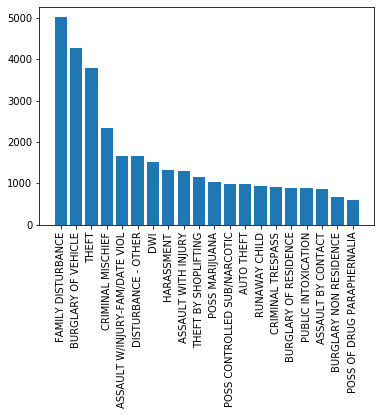

In [75]:
plt.bar(x_values, y_values )
plt.xticks(rotation = 90)

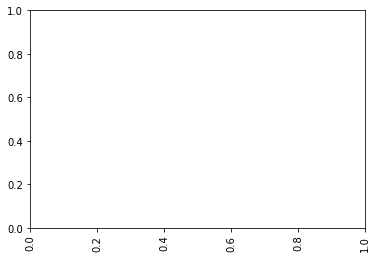